In [2]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [4]:
def format_ds(x, y):
    return tf.cast(x[..., np.newaxis], tf.float32)/255., y

BATCH_SIZE = 64

train, test = tf.keras.datasets.fashion_mnist.load_data()
train = tf.data.Dataset.from_tensor_slices(train)
test = tf.data.Dataset.from_tensor_slices(test)
train = train.map(format_ds).shuffle(1024).batch(BATCH_SIZE)
test = test.map(format_ds).batch(BATCH_SIZE)

In [5]:
loss_obj = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [31]:
def base_model():
    inputs = tf.keras.layers.Input(shape=(28, 28, 1), name='clothing')
    x = tf.keras.layers.Conv2D(64, 3, activation='relu')(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(64, activation='relu', name='dense_1')(x)
    x = tf.keras.layers.Dense(64, activation='relu', name='dense_2')(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax', name='preds')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model

In [32]:
def apply_gradient(optimizer, model, x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss = loss_obj(y_true=y, y_pred=logits)

    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    return logits, loss

def train_data_for_one_epoch(model):
    losses = []
    for step, (x_batch_train, y_batch_train) in enumerate(train):
        logits, loss_value = apply_gradient(optimizer, model, x_batch_train, y_batch_train)
        losses.append(loss_value)

        train_acc_metric(y_batch_train, logits)

    return losses

def perform_validation(model):
    losses = []
    for x_val, y_val in test:
        val_logits = model(x_val)
        val_loss = loss_obj(y_true=y_val, y_pred=val_logits)
        losses.append(val_loss)

        val_acc_metric(y_val, val_logits)

    return losses

In [33]:
model = base_model()

def train_model(model, train, test, EPOCHS=5):
    epochs_train_losses, epochs_val_losses = [], []
    for epoch in range(EPOCHS):
        losses_train = train
        print(f'EPOCH : {epoch}')

        losses_train = train_data_for_one_epoch(model)
        train_acc = train_acc_metric.result()

        losses_val = perform_validation(model)
        val_acc = val_acc_metric.result()

        losses_train_mean = np.mean(losses_train)
        losses_val_mean = np.mean(losses_val)
        epochs_train_losses.append(losses_train_mean)
        epochs_val_losses.append(losses_val_mean)

        print(f'train_loss={losses_train_mean: .4f}, train_acc={train_acc: .2f}, val_loss={losses_val_mean: .4f}, val_acc={val_acc: .2f}')

        train_acc_metric.reset_states()
        val_acc_metric.reset_states()

    return epochs_train_losses, epochs_val_losses

history = train_model(model, train, test)

EPOCH : 0
train_loss= 0.3976, train_acc= 0.86, val_loss= 0.3249, val_acc= 0.88
EPOCH : 1
train_loss= 0.2571, train_acc= 0.91, val_loss= 0.2929, val_acc= 0.89
EPOCH : 2
train_loss= 0.2141, train_acc= 0.92, val_loss= 0.2908, val_acc= 0.90
EPOCH : 3
train_loss= 0.1810, train_acc= 0.93, val_loss= 0.2784, val_acc= 0.91
EPOCH : 4
train_loss= 0.1547, train_acc= 0.94, val_loss= 0.3047, val_acc= 0.90


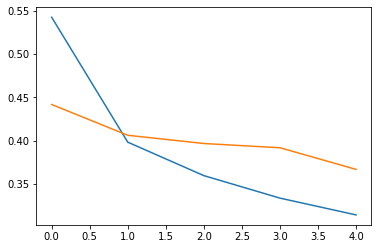

In [12]:
plt.plot(history[0])
plt.plot(history[1])

In [34]:
test_inputs = test#.batch(10001)
x_batches, y_pred_batches, y_true_batches = [], [], []

for x, y in test_inputs:
    y_pred = model(x)
    y_pred_batches = y_pred.numpy()
    y_true_batches = y.numpy()
    x_batches = x.numpy()

ind = np.random.choice(len(y_pred_batches), size=10)
imgs = x_batches[ind]
y_pred_to_plot = y_pred_batches[ind]
y_true_to_plot = y_true_batches[ind]



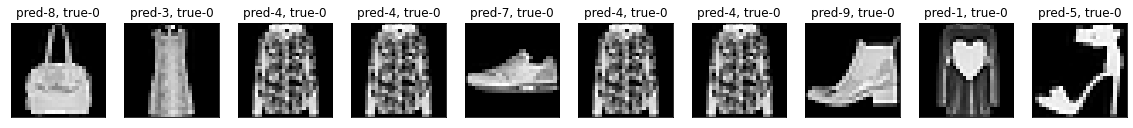

In [35]:
fig = plt.figure(figsize=(20, 4))
rows, cols = 1, 10
for i in range(rows*cols):
    fig.add_subplot(rows, cols, i+1)
    plt.title('pred-' + str(np.argmax(y_pred_to_plot[i])) + ', true-' + str(np.argmax(y_true_to_plot[i])))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imgs[i].reshape(28, 28), cmap='viridis' if np.argmax(y_true_to_plot[i])==np.argmax(y_pred_to_plot[i]) else 'gray')
plt.show()

In [18]:
np.argmax(y_true_to_plot)

3

In [42]:
@tf.function
def add(x, y):
    return x+y

print(tf.autograph.to_code(add.python_function))

def tf__add(x, y):
    with ag__.FunctionScope('add', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (ag__.ld(x) + ag__.ld(y))
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

